In [1]:
import numpy as np
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        X = dict[b'data']
        Y = dict[b'labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y
    
    
test_data,test_labels=unpickle('test_batch')

In [2]:
import pickle

In [3]:
with open("normalized_featuref.pkl",'rb') as file:
    normalized_feature=pickle.load(file);

In [4]:
with open("finallabelsf.pkl",'rb') as file:
    final_labels=pickle.load(file);

In [5]:
with open("test_featuref.pkl",'rb') as file:
     normalized_feature_test=pickle.load(file);

In [6]:
from sklearn import svm

# create an instance
clf = svm.SVC(kernel='linear',probability=True)

clf.fit(normalized_feature, final_labels)

SVC(kernel='linear', probability=True)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance 
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(normalized_feature, final_labels)

KNeighborsClassifier(n_neighbors=18)

In [8]:
from sklearn.linear_model import LogisticRegression

# Create an instance 
log_reg = LogisticRegression( max_iter=10000)


log_reg.fit(normalized_feature, final_labels)

LogisticRegression(max_iter=10000)

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance
clas = DecisionTreeClassifier()


clas.fit(normalized_feature, final_labels)

DecisionTreeClassifier()

In [10]:
#for svm

y_prob = clf.predict_proba(normalized_feature_test)
    
# Find the top 5 classes
top_5_classes = np.argsort(y_prob, axis=1)[:, -5:]
    
# Check if true label in one of 5 classes
correct = 0
for j in range(len(test_labels)):
    if test_labels[j] in top_5_classes[j, :]:
        correct += 1
accuracy = correct / len(test_labels)

In [11]:
print("Performance for top 5 classification for svm:",accuracy)

Performance for top 5 classification for svm: 0.9086


In [12]:
#for knn
y_prob = knn.predict_proba(normalized_feature_test)
    
# Find the top 5 classes
top_5_classes = np.argsort(y_prob, axis=1)[:, -5:]
    
# Check if true label in one of 5 classes
correct = 0
for j in range(len(test_labels)):
    if test_labels[j] in top_5_classes[j, :]:
        correct += 1
accuracy = correct / len(test_labels)

In [13]:
print("Performance for top 5 classification for knn:",accuracy)

Performance for top 5 classification for knn: 0.8476


In [14]:
#for logistic
y_prob = log_reg.predict_proba(normalized_feature_test)
    
# Find the top 5 classes
top_5_classes = np.argsort(y_prob, axis=1)[:, -5:]
    
# Check if true label in one of 5 classes
correct = 0
for j in range(len(test_labels)):
    if test_labels[j] in top_5_classes[j, :]:
        correct += 1
accuracy = correct / len(test_labels)

In [15]:
print("Performance for top 5 classification for logistic regression:",accuracy)

Performance for top 5 classification for logistic regression: 0.8989


In [16]:
#for decision
y_prob = clas.predict_proba(normalized_feature_test)
    
# Find the top 5 classes
top_5_classes = np.argsort(y_prob, axis=1)[:, -5:]
    
# Check if true label in one of 5 classes
correct = 0
for j in range(len(test_labels)):
    if test_labels[j] in top_5_classes[j, :]:
        correct += 1
accuracy = correct / len(test_labels)

In [17]:
print("Performance for top 5 classification for Decision Tree:",accuracy)

Performance for top 5 classification for Decision Tree: 0.5693


In [11]:
class MLP:
    
    def __init__(self,input_size,hidden_size,output_size):
    #initialize weights and biases for layers
        self.w1=np.random.randn(input_size,hidden_size) * (np.sqrt(2 / input_size)) 
        self.b1=np.zeros((1,hidden_size))
        self.w2=np.random.randn(hidden_size,hidden_size) * (np.sqrt(2 / hidden_size)) 
        self.b2=np.zeros((1,hidden_size))
        self.w3=np.random.randn(hidden_size,output_size) * (np.sqrt(2 / hidden_size)) 
        self.b3=np.zeros((1,output_size))
        

        
    def relu(self,x):
        # Define the relu activation function
        return np.maximum(0, x)
    
    def softmax(self, x):
        # Define the softmax activation function
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def cross(self,y,y_pred):
        return -np.sum(y * np.log(y_pred)) / y.shape[0]
        
    def forward(self,X):
        self.z1=np.dot(X,self.w1)+self.b1
        self.a1=self.relu(self.z1)
        self.z2=np.dot(self.a1,self.w2)+self.b2
        self.a2=self.relu(self.z2)
        self.z3=np.dot(self.a2,self.w3)+self.b3
        y_pred=self.softmax(self.z3)
        return y_pred
    
        
    def backward(self, X, y, y_pred, learning_rate):
      # Perform a backward pass through the network
        delta3 = y_pred - y
        dw3 = np.dot(self.a2.T, delta3)
        db3 = np.sum(delta3, axis=0).reshape(1,-1)
        delta2 = np.dot(delta3, self.w3.T) * (self.a2 > 0)
        dw2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0).reshape(1,-1)
        delta1 = np.dot(delta2, self.w2.T) * (self.a1 > 0)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0).reshape(1,-1)
        # Update the weights and biases
        self.w1 -= learning_rate * (dw1 / X.shape[0])
        self.b1 -= learning_rate * (db1 / X.shape[0])
        self.w2 -= learning_rate * (dw2 / X.shape[0])
        self.b2 -= learning_rate * (db2 / X.shape[0])
        self.w3 -= learning_rate * (dw3 / X.shape[0])
        self.b3 -= learning_rate * (db3 / X.shape[0])

In [12]:
#convert final_labels in one hot vector
one_hot_y = np.zeros((len(normalized_feature), 10))
one_hot_y[np.arange(len(normalized_feature)), final_labels] = 1

In [55]:
# Create an instance of the MLP model
input_size = 512
hidden_size = 64
output_size = 10
mlp = MLP(input_size, hidden_size, output_size)
cost_list=[]
# Define the number of iterations, the learning rate, and the batch size
epochs = 1000
learning_rate = 0.1
batch_size = 1000

# Calculate the number of batches
num_batches = normalized_feature.shape[0] // batch_size

# Train the model in batches
for i in range(epochs):
    for j in range(num_batches):
        start = j * batch_size
        end = start + batch_size
        batch_x = normalized_feature[start:end]
        batch_y = one_hot_y[start:end]
        probs = mlp.forward(batch_x)
        mlp.backward(batch_x, batch_y, probs, learning_rate)
    cost_list.append(mlp.cross(batch_y,probs))


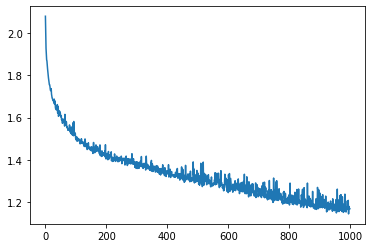

In [56]:
#cost_loss graph with no of iterations
import matplotlib.pyplot as plt
t = np.arange(0, epochs)
plt.plot(t, cost_list)      
plt.show()

In [57]:
probs=mlp.forward(normalized_feature_test)

In [58]:
predictions = np.argmax(probs, axis=1)

In [59]:
accuracy = np.mean(predictions == test_labels)

In [60]:
print("Accuracy of MLP  on testset:",accuracy)

Accuracy of MLP  on testset: 0.4773


In [61]:
top_5_classes=np.argsort(probs,axis=1)[:,-5:]

In [62]:
# Check if true label in one of 5 classes
correct = 0
for j in range(len(test_labels)):
    if test_labels[j] in top_5_classes[j, :]:
        correct += 1
accuracy = correct / len(test_labels)

In [63]:
print("Accuracy of MLP On testset of top 5 classification:",accuracy)

Accuracy of MLP On testset of top 5 classification: 0.9084


In [64]:
weights={}

weights['w1']=mlp.w1
weights['w2']=mlp.w2
weights['w3']=mlp.w3

In [65]:
biases={}

biases['b1']=mlp.b1
biases['b2']=mlp.b2
biases['b3']=mlp.b3

In [66]:
with open("weights.pkl","wb")as file:
    pickle.dump(weights,file)

In [67]:
with open("biases.pkl","wb")as file:
    pickle.dump(biases,file)